## Dependencies
Install them :)

In [31]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


## Load Data & Filter data
Start by using numpy to load data from csv into numpy array. This data was downloaded via IRIS API, in the future it could be loaded on the fly

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.integrate import cumulative_trapezoid
# using loadtxt()
data = np.loadtxt("fdsnws-dataselect_2023-05-05t20_30_32z.csv", delimiter=",", dtype=str)
print(data)

[['2023-04-30T07:58:00.019538Z' ' -28']
 ['2023-04-30T07:58:00.044538Z' ' -24']
 ['2023-04-30T07:58:00.069538Z' ' -17']
 ...
 ['2023-04-30T08:07:59.944538Z' ' -330']
 ['2023-04-30T08:07:59.969538Z' ' -337']
 ['2023-04-30T08:07:59.994538Z' ' -342']]


Data is given as table of sample date/time and then the sample in m/s with an unknown scaling factor, we know it samples at a rate of 40 hz, so we can remove the time stamp column, and cast the samples from string to int

In [16]:
samples = data[:, 1].astype(int)
print(samples)

[ -28  -24  -17 ... -330 -337 -342]


To visuallize the data, lets use pyplot. Our x is simply an array of indexes that match up with the samples

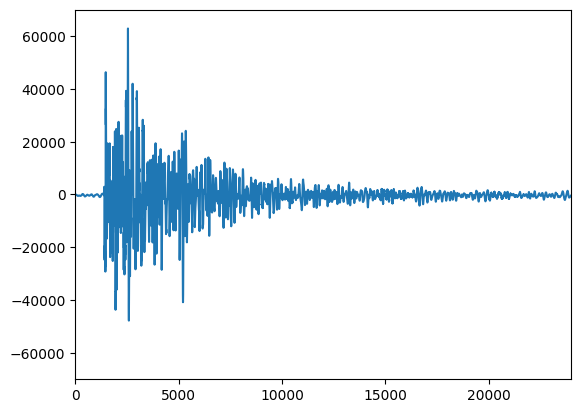

In [21]:
x = np.arange(len(samples))
y = samples[x]
plt.plot(x, y)
plt.axis([0, len(samples), -70000, 70000])
plt.show()

The data is about 8 minutes, lets look at a 10 second period, at 40hz that would be 400 samples

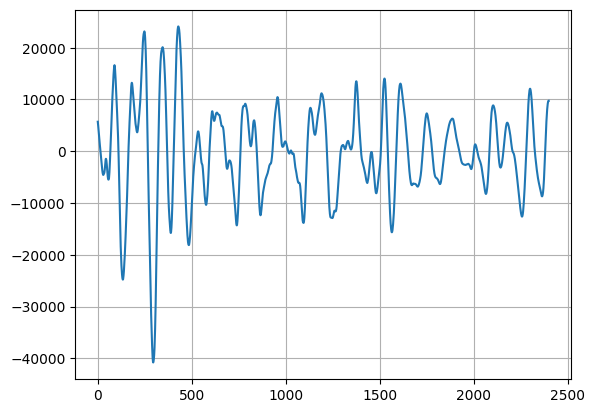

In [190]:
# startingPoint = 1350
startingPoint = 4920
seconds = 60
period = samples[startingPoint:startingPoint+(seconds*40)]
x = np.arange(len(period))
y = period[x]
plt.plot(x, y)
plt.grid()
# plt.axis([0, len(period), -70000, 70000])
plt.show()